# <font face="Verdana" size=6 color='#6495ED'> ANÁLISE ESTATÍSTICA DE DADOS

<font face="Verdana" size=3 color='#40E0D0'> Profs. Larissa Driemeier e Arturo Forner-Cordero

<center><img src='https://drive.google.com/uc?export=view&id=1CJsooGWXxTqWw0VeGAoroNb509nYKiRK' width="800"></center>

Este notebook faz parte da aula [07](https://alunoweb.net/moodle/pluginfile.php/113365/mod_resource/content/2/Aula06_Probabilidade.pdf) do curso IAD-001.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Modelo Probabilístico

Todo fenômeno ou experimento que envolva um elemento aleatório tem seu *modelo probabilístico* determinado, quando estabelecemos:

* __Um espaço amostral, $\Omega$__ No caso de uma variável discreta, o espaço amostral é a enumeração de todos os resultados possíveis do experimento:
$$\Omega = {\omega_1, \omega_2, \cdots, \omega_n}$$

 Cada resultado possível $\omega_i$ é um *ponto amostral*.

 Um exemplo simples é jogar uma moeda, enquanto observa se sai cara ou coroa. Um exemplo onde a variável é real é a observação de uma temperatura.

* __Uma probabilidade, $P(\omega_i)$__ Para cada ponto amostral, podemos considerar a probabilidade como uma função que recebe um elemento do espaço amostral e mapeia o resultado para um número real não negativo e menor ou igual a 1.
<center><img src='https://drive.google.com/uc?export=view&id=1cntVIIs8pSXYLQo1ybLuWXtMsDphEjP3' width="300"></center>


__Observação direta__

Joga-se o dado $n$ vezes e conta-se o número $f_i$ de vezes em que ocorre cada face $i$, $𝑖 = 1, 2, 3, 4, 5, 6$.

As proporções $f_i/n$ determinam a distribuição de frequências do fenômeno.

Se jogarmos o dado um número $n'$ vezes teremos outra distribuição de frequências, mas com um padrão que esperamos ser muito próximo ao anterior.

__Modelo teórico__

Mesmo sem observar diretamente o fenômeno é possível criar um modelo teórico, que reproduza bem a distribuição das frequências que se verifica quando se observa o próprio fenômeno.

Por exemplo, no lançamento de um dado, as suposições teóricas são:
* só podem ocorrer 6 faces;
* o dado é perfeitamente equilibrado;
* cada face deve ocorrer o mesmo número de vezes na proporção de $1/6$.




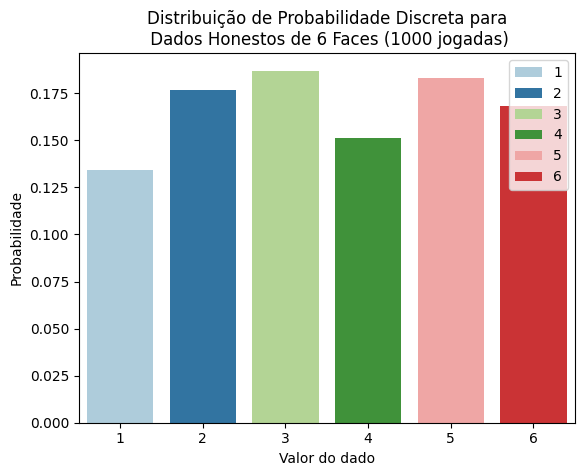

In [ ]:
num_rolls = 1000

values = [1, 2, 3, 4, 5, 6]
sample = np.random.choice(values, num_rolls)

# Numpy arrays contagens para cada lado
side, count = np.unique(sample, return_counts=True)
probs = count / len(sample)

# Plotando resultados
sns.color_palette("tab10")
sns.barplot(x=side, y=probs, hue = values, palette="Paired")
plt.title(
    f'Distribuição de Probabilidade Discreta para\n Dados Honestos de 6 Faces ({num_rolls} jogadas)')
plt.ylabel('Probabilidade')
plt.xlabel('Valor do dado')
plt.show()

# Probabilidade Condicionada

Em muitos casos, estamos interessados ​​na probabilidade de algum evento, dado que algum outro evento aconteceu. Isso é chamado de __probabilidade condicionada__.

Denotamos a probabilidade condicional de que um evento $H$ (de *Hipótese*)  ocorra dado que o evento $E$ (de *Evidência*) aconteceu como:

$$
\color{orange}{p(H|E)=p(H) \frac{p(E|H)}{p(E)}\tag{1}}
$$

A probabilidade condicional também pode ser dada por:

$$\color{orange}{P(H  | E) = \frac{P( H \cap E)}{P(E)} \tag{2}}$$

Embora $P(E)$ apareça na fórmula, geralmente é possível calcular
$$\color{orange}{P(E) = \sum_i P(E | H_i) P(H_i) \tag{3}} $$,
sendo $H_i$ cada subespaço amostral.

A fórmula é bastante útil em caso de incerteza do evento. Por exemplo, se eu perguntar: Você acha que vou caminhar até o meu local de trabalho? Inicialmente, você pode *chutar*  algo como uma probabilidade de $40%$ de que eu vá caminhar até meu local de trabalho. No entanto, se eu te der informações adicionais, como minha casa fica a dez minutos de caminhada do meu local de trabalho, a probabilidade de que eu realmente vá caminhar torna-se alta. Se, pelo contrário, eu disser que minha casa fica a mais de 6 km do meu escritório, a probabilidade de que eu caminhe até lá se torna pequena. Isso é a probabilidade condicional, a probabilidade de que eu caminhe até meu local de trabalho, dado que meu local de trabalho fica a dez minutos de caminhada da minha casa.

$p(H)$ a priori: reflete nossa crença, o que sabemos sobre o valor do parâmetro de interesse antes de olhar para os dados. Em nosso exemplo anterior, este é nosso palpite inicial de 40% de chance de eu caminhar até meu local de trabalho.

$p(E|H)$ verossimilhança: probabilidade de observar a evidência quando nossa hipótese $H$ está correta. Em outras palavras: qual é a probabilidade de observar nossos dados, dada nossa crença inicial (ou hipótese)? Em nosso exemplo, a evidência é a distância entre minha casa e o escritório. Qual é a probabilidade de que meu local de trabalho esteja a apenas dez minutos de caminhada da minha casa, se eu for caminhando até meu local de trabalho?

$p(H|E)$ a posteriori: este é o resultado da análise bayesiana: contém todo o nosso conhecimento sobre um certo problema, reunindo nosso modelo e nossos dados. Em nosso exemplo, qual é a probabilidade de eu caminhar até meu local de trabalho, dado que meu local de trabalho está a dez minutos de caminhada da minha casa?

$p(E)$ evidência: probabilidade marginal de observar nossos dados em qualquer situação possível, independentemente de nossa hipótese. É conhecida como fator de normalização, porque garante que a probabilidade a posteriori esteja entre $0-1$.

<img src='https://drive.google.com/uc?export=view&id=12sA6tTqj-4utAM1rrIg3BjphI3knO9Ob' width="700">

Como $p(E)$ é um fator de normalização,
$$
\color{orange}{p(H|E) \propto p(E|H) * p(H)\tag{4}}
$$




## Aplicação direta da fórmula

In [ ]:
def bayes(P_A, P_B,P_B_dado_A):
	P_A_dado_B = P_A * (P_B_dado_A ) / P_B
	return P_A_dado_B

### Potes de biscoito

São 2 potes de biscoito:
* O pote 1 tem 30 biscoitos de baunilha e 10 biscoitos de chocolate;
* O pote 2 tem 20 biscoitos de baunilha e 20 biscoitos de chocolate.

Você escolhe aleatoriamente um biscoito de um pote escolhido aleatoriamente. É de baunilha. Qual é a probabilidade de ser do pote 1?

Procuramos, portanto,
$$P(Pote\text{ }01|Baunilha) = P(Pote\text{ }01) \frac{P(Baunilha |Pote\text{ }01)}{P(Baunilha)}$$

In [ ]:
# probabilidade de escolher entre o Pote 1 e 2: a priori
p_pote_1 = 1/2

# baunilha / total de biscoitos: verossimilhança
p_baunilha_dado_pote_1 = 30/(30+10)

# total de biscoitos de baunilha / Total  de biscoitos: marginal
p_baunilha = (30+20) / (30+10 + 20+20)

# Bayes
p_pote_1_dado_baunilha = bayes(p_pote_1,p_baunilha,p_baunilha_dado_pote_1)

print('P(Pote 1 | Baunilha) = {:2.2f}%'.format(p_pote_1_dado_baunilha*100))

P(Pote 1 | Baunilha) = 60.00%


### Reparos em linha de produção
Mário é responsável por uma linha de produção automatizada, e recorre a companhias parceiras para fazerem reparos quando ocorrem falhas. A companhia A atende 20% das avarias e faz um reparo incompleto 1 vez em 20. A companhia B atende 60% das avarias e faz um reparo incompleto 1 vez em 10. A companhia C que atende 15% das avarias e faz uma reparo incompleto 1 vez em 10. A companhia D atende 5% das quebras e faz um reparo incompleto 1 vez em 20.

Para o próximo problema com a linha de produção diagnosticada como sendo devido a um reparo inicial incompleto, qual é a probabilidade que Mário tenha contratado a companhia A para esse reparo inicial?

In [ ]:
# P(A), P(B), P(C), P(D)
P_A = 0.20
P_B = 0.60
P_C = 0.15
P_D = 0.05

# P(B|A)
P_I_dado_A = 1/20
P_I_dado_B = 1/10
P_I_dado_C = 1/10
P_I_dado_D = 1/20


# P(B)
P_I = P_I_dado_A * P_A + P_I_dado_B * P_B + P_I_dado_C * P_C + P_I_dado_D * P_D

In [ ]:
# Cálculo de P(A|I)
resultado = bayes(P_A, P_I,P_I_dado_A)
# Sua resposta ao Mário
print('Mário.... ')
print('A probabilidade de você ter contratado a companhia A é de {:6.2f}%'.format(resultado * 100))

### Problema de Mário

Mário faz um exame para detectar uma rara e grave doença, que atinge 0,1% da população.

O médico informa que o falso positivo do exame é de 1%, ou seja, apenas 1% das pessoas saudáveis recebem erradamente a indicação, pelo exame, de que estão com a doença. Por outro lado, se o paciente tem a doença, o exame dá positivo em 99% dos casos.

O resultado do exame de Mário é positivo. Ele se desespera, achando que tem 99% de chance de estar com a doença.

Você tem algo a dizer para ele?

In [ ]:
# P(Do|Pos)
# P(Do)
P_Do = 0.1/100
P_nDo = 1 - P_Do

# P(Pos|Do)
P_Pos_dado_Do = 99/100
# P(Pos|nDo)
P_Pos_dado_nDo = 1/100

# P(Pos)
P_Pos = P_Pos_dado_Do * P_Do + P_Pos_dado_nDo * P_nDo

In [ ]:
# Cálculo de P(Do|Pos)
resultado = bayes(P_Do, P_Pos,P_Pos_dado_Do)
# Sua resposta ao Mário
print('Mário, A situação não é tão ruim assim.... ')
print('A probabilidade de você estar coma  doença, dado que seu exame deu positivo é de {:6.2f}%'.format(resultado * 100))

Mário, A situação não é tão ruim assim.... 
A probabilidade de você estar coma  doença, dado que seu exame deu positivo é de   9.02%


### Problema do Spam
O Mário, que nunca teve a doença do problema anterior, está usando um novo software para detectar spam: **SpamAssassin**.

O SpamAssassin é um sistema inteligente, que analisa cada mensagem que chega no servidor, e através de regras próprias, determina se o e-mail é um SPAM ou não. O programa é treinado pelos usuários. Ele procura padrões nas palavras dos e-mails marcados como spam pelo usuário. O software é atualizado regularmente, para que novas regras entrem no sistema, e passem a detectar os SPAMs com maior precisão.

Por exemplo, o software pode ter aprendido que a palavra “Rolex" aparece em 10% dos e-mails marcados como spam. Supondo que 0,1% dos e-mails não spam incluam a palavra “Rolex" e 50% de todos os e-mails recebidos pelo usuário são spam, encontre a probabilidade de um e-mail ser spam se a palavra “Rolex" aparecer nele.

In [ ]:
# P(A) e P(nA)
P_Spam = 0.50
P_nSpam = 1 - P_Spam

# P(B|A)
P_Rolex_dado_Spam = 0.10
P_Rolex_dado_nSpam = 0.001

#P(B)
P_Rolex = P_Rolex_dado_Spam * P_Spam + P_Rolex_dado_nSpam * P_nSpam

In [ ]:
# Cálculo de P(Spam|Free)
resultado = bayes(P_Spam, P_Rolex,P_Rolex_dado_Spam)
# Sua resposta
print('A probabilidade de Mário ter recebido um spam é de {:6.2f}%'.format(resultado * 100))

## Mais exemplos

### Novo teste de laboratório

Agora usaremos a fórmula no contexto de um exemplo mais realista. Uma equipe de biólogos quer medir a eficiência de um novo teste de HIV que eles desenvolveram (o HIV é um vírus que causa a AIDS, uma doença que afeta o sistema imunológico). Eles usaram o novo método para testar 53 pessoas, e os resultados estão resumidos na tabela abaixo:

$\text{ }$     | HIV | HIV$^C$ | Total
---   | --- | ---     | ---
T$^+$ |21   | 24      | 45
T$^-$ |2    | 6       | 8
Total |23   | 30      | 53


Lendo a tabela acima, podemos ver que:

* 23 pessoas estão infectadas com HIV;
* 30 pessoas não estão infectadas pelo HIV (HIV$^C$ significa não infectado pelo HIV – lembre-se dos slides,  que o "C" sobrescrito indica o complemento);
* 45 pessoas testaram positivo para HIV;
* 8 pessoas testaram negativo para HIV;
* Das 23 pessoas infectadas, 21 testaram positivo (diagnóstico correto);
* Das 30 pessoas não infectadas, 24 testaram positivo (diagnóstico errado).

A equipe agora pretende usar esses resultados para calcular as probabilidades de novos pacientes e descobrir se o teste é confiável o suficiente para ser usado em hospitais. Eles querem saber:

* Qual é a probabilidade de resultado positivo, dado que um paciente está infectado pelo HIV?
* Qual é a probabilidade de resultado negativo, dado que um paciente não está infectado pelo HIV?

$P(T^+|HIV)$ é a probabilidade de teste positivo, dado que o paciente está infectado pelo HIV, e, de acordo com a fórmula, temos:

\begin{equation}
P(T^+|HIV) = \frac{P(T^+ \cap HIV)}{P(HIV)}
\end{equation}

Existem 23 pessoas infectadas com HIV, o que significa $P(HIV) = \frac{23}{53}$. Das 23 pessoas infectadas com HIV, 21 também testaram positivo, o que significa $P(T^+ \cap HIV) = \frac{21}{53}$.

Isso significa que $P(T^+|HIV)$ é:

\begin{equation}
P(T^+|HIV) = \frac{21}{23} = 0.9130
\end{equation}

A probabilidade de um teste dar positivo, dado que o paciente está infectado pelo HIV, é, portanto, de 91,30% – isso pode sugerir que o novo teste é bastante bom para detectar o vírus HIV quando o vírus está realmente presente. No entanto, com uma probabilidade de 91,31%, podemos esperar que para cada 10.000 pacientes infectados pelo HIV, cerca de 9.131 pacientes terão o diagnóstico correto, enquanto os outros 869 não. A equipe provavelmente deve concluir que o teste precisa de mais refinamento no que diz respeito à detecção do vírus.


### Diferença entre $P(A|B)$ e $P(A \cap B)$

Uma maneira intuitiva de entender $P(A|B)$ é "se $B$ ocorreu, então qual é a probabilidade de que $A$ ocorra?" Isso sugere que ambos os eventos $A$ e $B$ ocorrem. No entanto, como $P(A \cap B)$ é a probabilidade de que A e B ocorram, então qual é a diferença entre $P(A|B)$ e $P(A \cap B)$, se houver?

Vamos jogar um dado honesto de seis lados e tentar encontrar $P(A|B)$ e $P(A \cap B)$, onde:
* $A$ é o evento em que o número é ímpar: $A = \{1, 3, 5\}$
* $B$ é o evento em que o número é maior que 1: $B = \{2, 3, 4, 5, 6\}$

Encontrar $P(A \cap B)$, a probabilidade de que $A$ e $B$ ocorram, significa encontrar a probabilidade de obtermos um número ímpar __e__ maior que 1 (3 ou 5), que é:

\begin{align}
P(A\cap B) &= \frac{\text{# resultados bem sucedidos}}{\text{# resultados possíveis}} = \frac{\{3, 5\}}{\{1, 2, 3, 4, 5, 6\}} = \frac{2}{6}
\end{align}

A probabilidade de obter um número ímpar __dado que__ obtivemos um número maior que 1, é:

\begin{equation}
P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(\{3,5\})}{P(\{2,3,4, 5,6\})} = \frac{2/6}{5/6} = \frac{2}{5}
\end{equation}



Com $P(A \cap B)$, estamos tentando encontrar a probabilidade de dois eventos $(A$ e $B)$, enquanto com $P(A|B)$ estamos tentando encontrar apenas a probabilidade de um único evento, que é $A$, pois o evento $B$ sabemos que já ocorreu.

### Loja de eletrônicos

Uma loja de eletrônicos fez uma amostragem aleatória de 2.000 clientes e analisou o comportamento do cliente em relação à compra de laptops e mouses sem fio. Os resultados estão resumidos na tabela abaixo, onde:

* $L$ significa que o cliente comprou um laptop;
* $M$ significa que o cliente comprou um mouse;
* $L^C$ significa que o cliente não comprou um laptop;
* $M^C$ significa que o cliente não comprou um mouse.

$\text{ }$ | L   | L$^C$ | Total
---        | --- | ---     | ---
M          |32   | 483     | 515
M$^C$      |58   | 1427    | 1485
Total      |90   | 1910    | 2000

Encontrar:

* $P(M)$, a probabilidade de um cliente comprar um mouse — atribua sua resposta a `p_m`.
* $P(M|L)$, a probabilidade de um cliente comprar um mouse dado que comprou um laptop — atribua sua resposta a `p_m_dado_l`.
* $P(M \cap L)$, a probabilidade de um cliente comprar um mouse e um laptop — atribua sua resposta a `p_m_e_l`.
* $P(M \cup L)$, a probabilidade de um cliente comprar um mouse ou um laptop — atribua sua resposta a `p_m_ou_l`.

In [ ]:
# @title Resposta
p_m = 515/2000
p_m_dado_l = 32/90
p_m_e_l = 32/2000
p_m_ou_l = 90/2000 + 515/2000 - p_m_e_l
print('Probabilidade de um cliente comprar um mouse                           : {:2.2%}' .format(p_m))
print('Probabilidade de um cliente comprar um mouse dado que comprou um laptop: {:2.2%}' .format(p_m_dado_l))
print('Probabilidade de um cliente comprar um mouse e um laptop               : {:2.2%}' .format(p_m_e_l))
print('Probabilidade de um cliente comprar um mouse ou um laptop              : {:2.2%}' .format(p_m_ou_l))

* $P(M|L^C)$ — atribua sua resposta a `p_m_dado_non_l`.
* $P(L^C|M)$ — atribua sua resposta a `p_non_l_dado_m`.
* $P(M \cap L^C)$ — atribua sua resposta a `p_m_e_non_l`.
* $P(L^C \cup M)$ — atribua sua resposta a `p_non_l_ou_m`.


In [ ]:
# @title Resposta
p_m_dado_non_l = 483/1910
p_non_l_dado_m = 483/515
p_m_e_non_l = 483/2000
p_non_l_ou_m = 1910/2000 + 515/2000 - p_m_e_non_l
print('Probabilidade de um cliente comprar um mouse dado que não comprou um laptop: {:2.2%}' .format(p_m_dado_non_l))
print('Probabilidade de um cliente não comprar um laptop dado que comprou um mouse: {:2.2%}' .format(p_non_l_dado_m))
print('Probabilidade de um cliente comprar um mouse e não comprar um laptop       : {:2.2%}' .format(p_m_e_non_l))
print('Probabilidade de um cliente comprar um mouse ou não comprar um laptop      : {:2.2%}' .format(p_non_l_ou_m))

Para nosso exemplo de loja de eletrônicos, digamos que novos dados sejam coletados e sabemos que:

* $P(B|M) = 0.1486$, a probabilidade de um cliente comprar baterias dado que comprou um mouse é 0.1486.
* $P(C|L) = 0.0928$, a probabilidade de um cliente comprar um cooler dado que comprou um laptop é 0.0928.
* $P(B^C|C) = 0.7622$, a probabilidade de um cliente não comprar baterias dado que comprou um cooler é 0.7622.

Encontre:

* $P(B^C|M)$, e atribua sua resposta a `p_non_b_dado_m`.
* $P(C^C|L)$, e atribua sua resposta a `p_non_c_dado_l`.
* $P(B|C)$, e atribua sua resposta a `p_b_dado_c`.
* $P(B|M^C)$, e atribua sua resposta a `p_b_dado_non_m`. Se você acha que não pode é possível calcular a probabilidade, atribua a string 'nao possivel' à mesma variável `p_b_dado_non_m`.

In [ ]:
# @title Resposta
p_b_dado_m = 0.1486
p_c_dado_l = 0.0928
p_non_b_dado_c = 0.7622
p_non_b_dado_m = 1 - p_b_dado_m
p_non_c_dado_l = 1 - p_c_dado_l
p_b_dado_c = 1 - p_non_b_dado_c
p_b_dado_non_m = 'nao possivel'
print('Probabilidade de um cliente não comprar bateria dado que comprou um mouse   : {:2.2%}' .format(p_non_b_dado_m))
print('Probabilidade de um cliente não comprar um cooler dado que comprou um laptop: {:2.2%}' .format(p_non_c_dado_l))
print('Probabilidade de um cliente comprar bateria dado que comprou um cooler      : {:2.2%}' .format(p_b_dado_c))
print('Probabilidade de um cliente comprar bateria dado que não comprou mouse      : {}' .format(p_b_dado_non_m))

# Regra da multiplicação

Note que $A \cap B = B \cap A$ de modo que $P(A \cap B) = P(B \cap A)$. Como consequência, temos duas fórmulas diferentes que podemos usar para calcular $P(A \cap B)$:
\begin{equation}
P(A \cap  B) = P(A|B) \ P(B)
\end{equation}
\begin{equation}
P(A \cap  B) = P(B|A) \ P(A)
\end{equation}

Qualquer uma das duas fórmulas acima é chamada de regra de multiplicação de probabilidade – ou, em resumo, regra de multiplicação.



## Exemplos

### Bolinhas em um recipiente

Suponha que temos um recipiente com seis bolinhas verdes e quatro bolinhas vermelhas. Se estamos tirando uma bolinha de cada vez aleatoriamente e sem reposição (sem reposição significa que não colocamos as bolinhas retiradas de volta no recipiente), então qual é a probabilidade de obter uma bolinha vermelha na primeira retirada, seguida de uma verde na segunda?


Podemos usar a regra da multiplicação para calcular $P(A \cap  B)$ em nosso exemplo com as bolinhas, onde $A$ é o evento de obtermos uma bolinha vermelha na primeira retirada e $B$ é o evento de obtermos uma bolinha verde segundo sorteio.

Das dez bolinhas no recipiente, quatro bolinhas são vermelhas, então temos:
\begin{equation}
P(A) = \frac{4}{10}
\end{equation}

Estamos amostrando sem reposição (não colocamos de volta as bolinhas depois de retiradas), o que significa que, para o segundo sorteio, restam nove bolinhas. Dado que a primeira bolinha é vermelha, temos seis bolinhas verdes no recipiente, então a probabilidade de obter uma bolinha verde na segunda retirada (B) dado que obtivemos uma bolinha vermelha na primeira retirada (A) é:
\begin{equation}
P(B|A) = \frac{6}{9}
\end{equation}

Usando a regra da multiplicação, vemos que $P(A \cap  B)$, a probabilidade de tirar uma bolinha vermelha seguida de uma bolinha verde, é:
\begin{equation}
P(A \cap  B) = P(A) \ P(B|A) = \frac{4}{10} \ \frac{6}{9} = \frac{24}{90}
\end{equation}


Ainda na longa pesquisa em nossa loja de eletrônicos, sabemos:

* A probabilidade de um cliente comprar memória RAM de uma loja de eletrônicos é $P(RAM) = 0.0822$.
* A probabilidade de um cliente comprar um laptop para jogos é $P(GL) = 0.0184$.
* A probabilidade de um cliente comprar memória RAM dado que comprou um laptop para jogos é $P(RAM | GL) = 0.0022$.

Calcular:

1. $P(GL \cap RAM)$ — atribua sua resposta a `p_gl_e_ram`.
1. $P(RAM^C | GL)$ — atribua sua resposta a `p_non_ram_dado_gl`.
1. $P(GL \cap RAM^C)$ — atribua sua resposta a `p_gl_e_non_ram`.
1. $P(GL \cup RAM)$ — atribua sua resposta a `p_gl_ou_ram`.

In [ ]:
# @title Resposta
p_ram = 0.0822
p_gl = 0.0184
p_ram_dado_gl = 0.0022
p_gl_e_ram = p_gl * p_ram_dado_gl
p_non_ram_dado_gl = 1 - p_ram_dado_gl
p_gl_e_non_ram = p_gl * p_non_ram_dado_gl
p_gl_ou_ram = p_ram + p_gl - p_gl_e_ram
print('Probabilidade de um cliente comprar laptop para jogos e memória RAM                   : {:2.2%}' .format(p_non_b_dado_m))
print('Probabilidade de um cliente não comprar memória RAM dado que comprou laptop para jogos: {:2.2%}' .format(p_non_ram_dado_gl))
print('Probabilidade de um cliente comprar laptop para jogos e não comprar memória RAM       : {:2.2%}' .format(p_gl_e_non_ram))
print('Probabilidade de um cliente comprar laptop para jogos ou memória RAM                  : {:2.2%}' .format(p_gl_ou_ram))

# Inferência Bayesiana

<blockquote><span style="font-size:10px;">The essence of the Bayesian approach is to provide a mathematical rule explaining how you should change your existing beliefs in the light of new evidence. In other words, it allows scientists to combine new data with their existing knowledge or expertise. The canonical example is to imagine that a precocious newborn observes his first sunset, and wonders whether the sun will rise again or not. He assigns equal prior probabilities to both possible outcomes, and represents this by placing one white and one black marble into a bag. The following day, when the sun rises, the child places another white marble in the bag. The probability that a marble plucked randomly from the bag will be white (ie, the child's degree of belief in future sunrises) has thus gone from a half to two-thirds. After sunrise the next day, the child adds another white marble, and the probability (and thus the degree of belief) goes from two-thirds to three-quarters. And so on. Gradually, the initial belief that the sun is just as likely as not to rise each morning is modified to become a near-certainty that the sun will always rise.</span></blockquote>

<span style="font-size:11px;"> Extraído do [link](https://www.cs.ubc.ca/~murphyk/Bayes/economist.html). </span>

A inferência bayesiana utiliza o Teorema de Bayes como uma ferramenta de atualização da opinião do pesquisador por meio da aprendizagem com a experiência.

Em outras palavras, o conhecimento inicial sobre o parâmetro estudado é modificado depois que o experimento foi realizado.

$${P(A | B) = P(A) \frac{ P(B | A)}{P(B)} }$$

O palpite inicial sobre os parâmetros foi $P(A)$. A inferência bayesiana atualiza um $P(𝐴)$  simples para algo mais informativo – $P(A|B)$  – à medida que mais dados se tornam disponíveis. $P(A|B)$ ainda é a probabilidade de $𝐴$, assim como $P(𝐴)$.  No entanto, $P(A|B)$   é uma versão mais inteligente de $P(A)$.



## Lançamento de moeda

Vamos supor que temos duas moeda idênticas, ie, você não consegue distinguir qual é qual. Porém, uma é não viciada (*honesta*), cujas probabilidades de cara e coroa são:
$$
P(cara)=50\% \qquad P(coroa) = 50\%
$$

A outra moeda é muito viciada,
$$
P(cara)=80\% \qquad P(coroa) = 20\%
$$

Suponha que eu coloque as duas em um saco, chacoalhe de modo que sua chance de escolher qualquer uma delas seja 50%, e você escolha uma. Seu desafio será determinar essas probabilidades da forma mais exata possível, lançando as moedas 10 vezes.

Obviamente, esse exemplo não é tão realista, porém, introduz conceitos importantes a respeito da _inferência bayesiana_.

Quando você tirou a moeda do saco, lançou e saiu *cara*. Vamos chamar de hipótese 01 (H1) a hipótese que afirma que a moeda é honesta, e hipótese 2 (H2) a hipótese que afirma que a moeda não é honesta.

Qual a probabilidade da hipótese H1?

Mesmo antes de jogá-la, você poderia razoavelmente dizer que estava 0.5 confiante de que a moeda da sua mão era viciada e 0.5 confiante de que não era.


In [ ]:
p_H1 = 0.50
p_H2 = 0.50
p_cara_dado_H1 = 0.5
p_cara_dado_H2  = 0.8

In [ ]:
#0 --> Cara
#1 --> Coroa
# Aqui estamos simulando jogar uma moeda que tem probabilidade p de dar Cara
# ou seja, se p = 0,5 a moeda é honesta
def coin_flip(p=0.5):
  num = random.randint(1,10)
  if num <= p*10:
    num = 0 # deu cara
  else:
    num = 1 # deu coroa
  return num

In [ ]:
# Jogando a moeda n vezes

def flip_result(p=0.5,n=1):
  results = 0
  data1 = []
  for i in range(n):
    flip = coin_flip(p)
    results = results + flip
    #Calculando o valor de probabilidade de Cara:
    p_coroa = results/(i+1)
    data1.append(flip)
    p_cara = 1.0 - p_coroa
  print('Resultado dos {:d} Lançamentos:{}'.format(n,data1))
  print('P(Coroa) = {:6.3f}%'.format(p_coroa*100))
  print('P(Cara) = {:6.3f}%'.format(p_cara*100))
  return data1,p_coroa,p_cara

In [ ]:
data1,p_coroa,p_cara = flip_result(p=p_cara_dado_H2,n=10)# veja que aqui estamos simulando a moeda viciada

Resultado dos 10 Lançamentos:[1, 0, 0, 1, 0, 0, 1, 0, 0, 0]
P(Coroa) = 30.000%
P(Cara) = 70.000%


Qual a probabilidade de verificar o resultado acima, dado que a moeda é viciada ou não viciada?

Procuramos, portanto, as probabilidades,
$$P(H1|data) = P(H1) \frac{P(data |H1)}{P(data)}$$
e
$$P(H2|data) = P(H2) \frac{P(data |H2)}{P(data)}$$

Vamos atualizar nossas crenças para cada jogada...


In [ ]:
def prob_data(data1):
  # vamos inicializar as probabilidades em 1.
  p_data1_dado_H1 = 1.
  p_data1_dado_H2 = 1.
  for i in data1:
    if i != 0:
      # probabilidade de ter dado coroa, dado que a H1 é correta (moeda honesta)
      p_data1_dado_H1 *=  (1.-p_cara_dado_H1)
      # probabilidade de ter dado coroa, dado que a H2 é correta (moeda viciada)
      p_data1_dado_H2 *=  (1.-p_cara_dado_H2)
    else:
      # probabilidade de ter dado cara, dado que a H1 é correta (moeda honesta)
      p_data1_dado_H1 *= p_cara_dado_H1
      # probabilidade de ter dado cara, dado que a H2 é correta (moeda viciada)
      p_data1_dado_H2 *= p_cara_dado_H2
  p_data = p_data1_dado_H1 * p_H1 + p_data1_dado_H2 * p_H2
  return p_data, p_data1_dado_H1, p_data1_dado_H2

In [ ]:
p_data, p_data1_dado_H1, p_data1_dado_H2 = prob_data(data1)

In [ ]:
print('P(Data | H1) = {:10.8f} %'.format(p_data1_dado_H1*100))
print('P(Data | H2) = {:10.8f} %'.format(p_data1_dado_H2*100))
print('P(Data) = {:10.8f} %'.format(p_data*100))

P(Data | H1) = 0.09765625 %
P(Data | H2) = 0.16777216 %
P(Data) = 0.13271420 %


In [ ]:
p_H1_dado_data = p_H1 * p_data1_dado_H1/p_data
p_H2_dado_data = p_H2 * p_data1_dado_H2/p_data

print('P(H1 | Data) = {:6.2f}%'.format(p_H1_dado_data*100))
print('P(H2 | Data) = {:6.2f}%'.format(p_H2_dado_data*100))

P(H1 | Data) =  36.79%
P(H2 | Data) =  63.21%


Após jogar a moeda 10 vezes, você seguramente tem uma confiança maior de que a moeda não é honesta; portanto, sua crença mudou significativamente após os 10  lançamentos aleatórios...

Se você continuasse jogando a moeda e visse consideravelmente mais caras do que coroas (o que é esperado, proque estamos artificialmente simulando um lançamento da moeda viciada), você ficaria progressivamente mais convencido de que a moeda era viciada...


10 vezes é uma amostra grande. Qual seria sua conclusão se você pudesse jogar só 3 vezes? Simule.

Simule também todo o processo, supondo que a moeda fosse honesta. O que você concluiria com 3 e 10 sorteios?



# Monte Carlo

<blockquote><span style="font-size:10px;"> A Simulação de Monte Carlo, também conhecida como Método de Monte Carlo ou uma simulação de probabilidade múltipla, é uma ferramenta matemática poderosa para lidar com a incerteza e estimar resultados de eventos complexos. O Método de Monte Carlo foi inventado por John von Neumann e Stanislaw Ulam durante a Segunda Guerra Mundial para melhorar a tomada de decisão em condições adversas e incertas. A analogia com o jogo de roleta em Mônaco é interessante, já que ambos dependem do acaso, mas, ao contrário do jogo, a simulação de Monte Carlo é usada para trazer mais clareza e rigor matemático à análise de problemas reais.</span></blockquote>

<blockquote><span style="font-size:10px;">A Simulação de Monte Carlo é uma técnica sofisticada que permite prever uma gama de resultados possíveis com base em uma série de valores estimados para variáveis de entrada. Em essência, ela constrói um modelo que reflete a incerteza inerente em determinadas variáveis, utilizando distribuições de probabilidade como uniforme ou normal. Através de iterações repetidas, cada vez com conjuntos diferentes de números aleatórios dentro de intervalos predefinidos, a simulação recalcula os resultados, gerando assim uma ampla gama de resultados possíveis. </span></blockquote>

<blockquote><span style="font-size:10px;"> Além disso, as simulações de Monte Carlo destacam-se por sua utilidade em previsões de longo prazo, graças à sua capacidade de lidar com grande quantidade de informações e produzir previsões mais precisas à medida que mais dados são incorporados. Ao término da simulação, uma variedade de resultados é apresentada, juntamente com a probabilidade de ocorrência de cada um, fornecendo uma visão abrangente e probabilística do cenário em questão.</span></blockquote>

<span style="font-size:11px;"> Adaptado do [link](https://www.ibm.com/br-pt/cloud/learn/monte-carlo-simulation). </span>

## Lançamento de moeda

Vamos, rapidamente, modelar via Monte Carlo o lançamento da moeda.

In [ ]:
 #Simulação de Monte Carlo :

#Lista vazia para armazenar os valores de probabilidade
list1 = []

def monte_carlo(n):
    results = 0
    for i in range(n):
        flip_result = coin_flip(0.8)
        results = results + flip_result

        #Calculando o valor de probabilidade:
        prob_value = results/(i+1)

        #Anexando os valores de probabilidade à lista:
        list1.append(prob_value)

        #Plotando os resultados:
        plt.axhline(y=0.5, color='r', linestyle='-')
        plt.xlabel("Iterações")
        plt.ylabel("Probabilidade")
        plt.plot(list1)

    return results/n


Final value : 0.1984


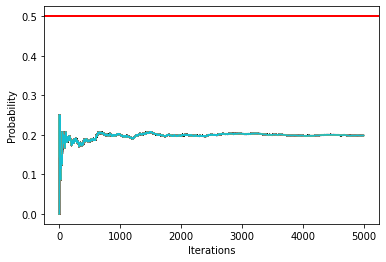

In [ ]:
answer = monte_carlo(5000)
print("Valor final de probabilidade de sair coroa (1) :",answer)

## Jogo de dados
Vamos simular um jogo de dados usando Monte Carlo. Nosso jogo simples envolverá dois dados. Para ganhar, o jogador precisa obter o mesmo número em ambos os dados lançados juntos. Um dado de seis faces tem seis resultados possíveis (1, 2, 3, 4, 5 e 6). Com dois dados, tem-se 36 resultados possíveis (1 e 1, 1 e 2, 1 e 3, etc., ou 6 x 6 = 36 possibilidades - se você não enxerga as 36 combinações, veja os slides da aula). Neste jogo, a casa tem mais oportunidades de ganhar (30 resultados vs. 6 resultados do jogador), o que significa que a casa tem a vantagem.

 Digamos que nosso jogador tenha um saldo inicial de  $R\$ 1000,00$ e esteja preparado para perder tudo. Então, ele aposta $R\$ 1,00$ em cada lançamento e decide tentar a sorte em $1000$ lançamentos. Como a casa é muito generosa, ela oferece o pagamento de $4$ vezes a aposta do jogador quando o jogador ganha. Portanto, se o jogador milagrosamente fizer uma sequência de $1000$ vitórias em $1000$ lançamentos, pode voltar para casa com $R\$ 5000,00$. Se perder todas as rodadas, volta para casa sem nada. Não é uma má relação risco-recompensa... ou é?

 Analise a resposta (__veja que o problema está resolvido abaixo ea resposta foi adaptada do [link](https://towardsdatascience.com/how-to-create-a-monte-carlo-simulation-using-python-c24634a0978a)__).

<img src='https://drive.google.com/uc?export=view&id=1p8Pe00sjYaj_dNu5IUCao4U6VpeBPm0n' width="400">

Em cada simulação de Monte Carlo - aliás, todo problema que se tenta resolver - você precisa definir quais são as entradas e quais informações você deseja obter. Já definimos quais são nossas entradas, dissemos que o número de lançamentos em cada jogada é 1000 (`max_num_rolls = 1000`), e o valor que o jogador apostará em cada lançamento é de R\$ 1 (`bet = 1`). Além das variáveis de entrada, é necessário definir quantas vezes o jogo será simulado. A variável `num_simulations` armazernará o número de simulações de Monte Carlo a serem feitas. Quanto maior for esse número, mais precisa será a probabilidade prevista em relação ao seu valor verdadeiro.

O número de variáveis de rastreamento geralmente aumenta com a complexidade de um projeto. Para este exemplo, serão utilizadas duas variáveis: a probabilidade de vitória armazenada na variável `win_probability` (vitórias por jogo divididas pelo número total de jogadas) e o saldo final de cada simulação (ou jogo) armazenado na variável `end_balance`.

In [ ]:
# Dados de entrada e de rastreamento

# Inputs
num_simulations = 10000
max_num_rolls = 1000
bet = 1

# Tracking
win_probability = []
end_balance = []

In [ ]:
# Criar a função de lançamento artificial
def roll_dice():
    die_1 = random.randint(1, 6)
    die_2 = random.randint(1, 6)

    # Determinar se os dados têm o mesmo número
    if die_1 == die_2:
        same_num = True
    else:
        same_num = False
    return same_num

In [ ]:
# Creating Figure for Simulation Balances
fig = plt.figure()
plt.title('Monte Carlo para lançamento de dados [' + str(num_simulations) + ' simulações]')
plt.xlabel("Lançamento")
plt.ylabel("Balanço [R$]")
plt.xlim([0, max_num_rolls])

win_probability = []
end_balance = []
# Loop para o número de simulações desejadas 'num_simulations'
for i in range(num_simulations):
    balance = [1000]
    num_rolls = [0]
    num_wins = 0
    # Lançamento até que o jogador tenha lançado 'max_num_rolls' vezes
    while num_rolls[-1] < max_num_rolls:
        same = roll_dice()
        # Resultado se os dados forem do mesmo número
        if same:
            balance.append(balance[-1] + 4 * bet)
            num_wins += 1
        # Resultado se os dados forem de números diferentes
        else:
            balance.append(balance[-1] - bet)

        num_rolls.append(num_rolls[-1] + 1)
# Armazenar variáveis de rastreamento e adicionar linha à figura
    win_probability.append(num_wins/num_rolls[-1])
    end_balance.append(balance[-1])
    plt.plot(num_rolls, balance)

In [ ]:
# Mostrar o gráfico após a conclusão das simulações
fig = plt.figure()
area = [i * 200 for i in win_probability]
axis = plt.scatter(list(range(num_simulations)), end_balance,  s=area, c =win_probability, alpha = 0.6 )
plt.title('Monte Carlo para lançamento de dados [' + str(num_simulations) + ' simulações]')
plt.xlabel("Jogada")
plt.ylabel("Balanço Final [R$]")
plt.xlim([0, max_num_rolls])
#cbar = fig.colorbar(axis,ticks=[0,0.5,1])
plt.colorbar(label='Probabilidade de vitória')
plt.show()

# Probabilidade de vitória média e saldo final
overall_win_probability = sum(win_probability)/len(win_probability)
overall_end_balance = sum(end_balance)/len(end_balance)
# Exibir as médias
print('Probabilidade média de vitória após {:8d} jogadas: {:5.4f}'.format(num_simulations,overall_win_probability))
print('Saldo final médio após {:8d} jogadas: R$ {:6.2f}'.format(num_simulations,overall_end_balance))

A partir de nossa figura, podemos determinar que o jogador raramentese  obtém lucro após 1000 jogadas. Na verdade, o saldo final médio das 10.000 simulações é de, aprox., R$ 834. Assim, mesmo que a casa tenha sido _generosa_ em pagar 4 vezes a aposta quando o jogador ganhou, ela ainda saiu por cima.

Outra importante análise é acerca da probabilidade de vitória  de, ~0.1667, ou aproximadamente 1/6. Lembre-se que foi comentado anteriormente que o jogador pode vencer com 6 possíveis resultados e que existem 36 lançamentos possíveis. Usando esses dois números, esperaríamos que o jogador ganhasse 6 das 36 jogadas, ou 1/6 das jogadas, o que corresponde à nossa previsão de Monte Carlo.

# Sua lição de casa

<img src='https://drive.google.com/uc?export=view&id=1_1jsA41H4nNIgig_4HGoq0BPhksHkm0W' width="400">


Antes de fazer a lição, estude a aula.

1. Uma empresa que oferece uma ferramenta de gerenciamento de tarefas baseada em navegador pretende fazer publicidade direcionada com base nos navegadores das pessoas. Os dados que eles coletaram sobre seus usuários estão descritos na tabela abaixo.

![Browsers](https://drive.google.com/uc?export=view&id=1isVuH0xFeeo1mNfBnZ3wacy-zw1VAybc)

 * Ache:
  * P(Premium | Chrome) — a probabilidade de um usuário escolhido aleatoriamente ter uma assinatura premium, dado que seu navegador é o Chrome. Atribua sua resposta a `p_premium_dado_chrome`.
  * P(Basic | Safari) — a probabilidade de que um usuário escolhido aleatoriamente tenha uma assinatura básica, dado que seu navegador é o Safari. Atribua sua resposta a `p_basic_dado_safari`.
  * P(Free | Firefox)} — a probabilidade de que um usuário escolhido aleatoriamente tenha uma assinatura gratuita, dadoque seu navegador é o Firefox. Atribua sua resposta a `p_free_dado_firefox`.
  * Entre um usuário do Chrome e um usuário do Safari, quem tem mais probabilidade de ter uma assinatura premium? Se você acha que um usuário do Chrome é a resposta, atribua a string 'Chrome' a uma variável chamada `more_likely_premium`, caso contrário, atribua 'Safari'. Para resolver este exercício, você também precisará calcular P(Premium | Safari).

2. O M&M azul foi lançado em 1995. Antes disso, a mistura de cores em um saco de M&Ms simples era (30% Marrom, 20% Amarelo, 20% Vermelho, 10% Verde, 10% Laranja, 10% Castanho). Depois ficou (24% Azul, 20% Verde, 16% Laranja, 14% Amarelo, 13% Vermelho, 13% Marrom).
Um amigo meu tem dois sacos de M&Ms, e ele me diz que um é de 1994 e outro de 1996. Ele não me diz qual é qual, mas me dá um M&M de cada saco. Um é amarelo e o outro é verde. Qual é a probabilidade de que o M&M amarelo tenha vindo da sacola de 1994?

3. Analise o problema de inferência estatística, do lançamento de moedas, diminuindo o número de lançamentos do exemplo. Depois, simule que você retirou a moeda honesta e refaça a análise.

5. Com relação ao exemplo do jogo de dados usando Monte Carlo. Refaça para 3 dados e tire suas conclusões.